# TS01 - Primeros pasos en la simulación

Author: Juan Chirino  
Date: 01/04/2025


## Consigna
En este primer trabajo comenzaremos por diseñar un generador de señales que utilizaremos en las primeras simulaciones que hagamos. La primer tarea consistirá en programar una función que genere señales senoidales y que permita parametrizar:

- la amplitud máxima de la senoidal (volts)
- su valor medio (volts)
- la frecuencia (Hz)
- la fase (radianes)
- la cantidad de muestras digitalizada por el ADC (# muestras)
- la frecuencia de muestreo del ADC.


es decir que la función debería admitir se llamada de la siguiente manera

    tt, xx = mi_funcion_sen( vmax = 1, dc = 0, ff = 1, ph=0, nn = N, fs = fs)



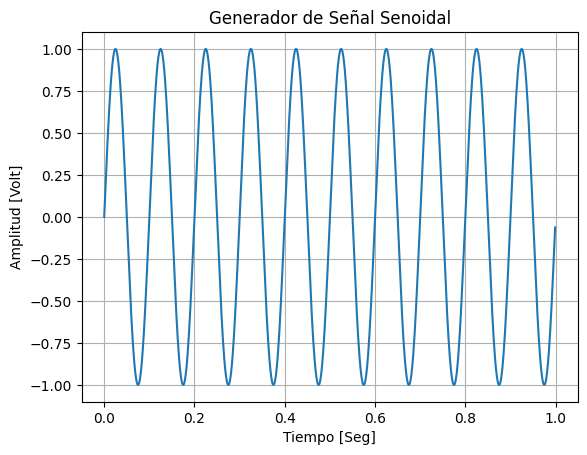

In [25]:
"""
TPS01 -  Generador de Señal Senoidal 

El siguiente script pretende emular un generador de funciones de laboratorio
recibe como parametros de entrada

    la amplitud máxima de la senoidal (volts)
    su valor medio (volts)
    la frecuencia (Hz)
    la fase (radianes)
    la cantidad de muestras digitalizada por el ADC (# muestras)
    la frecuencia de muestreo del ADC.

    
Devuelve un vector de tiempos y amplitudes con la funcion generada

tt, xx 


Created on Sun Mar 30 03:12:15 2025

@author: jchirino
"""
import numpy as np
import matplotlib.pyplot as plt


#Parametros de entrada del gegerador

A_max = 1     #Amplitud [Volt]
DC_offset = 0 #Componente de continua [Volt]
Freq = 10.0     #Frecuencia [Hz]
Phase = 0.0     #fase [Rad]

#Parametos del Conversor A/D
#Conviene Normalizar la resolucion espectral a 1Hz haciendo N_sample=Fs 
N_sample = 1000
Fs = 1000
Ts = 1/Fs

# Defino el vector de tiempo, se prefiere usar arrage() en lugar de linspace()
# Ya que se tiene certeza sobre la cantidad de elementos que incluye el vector
tt = np.arange(0, N_sample*Ts, Ts)

#Funcion para gegerar las muestras del Conversor A/D
def func_sen(A_max, DC_offset, Freq, Phase, N_sample, Fs):
    
    xx = A_max * np.sin(2 * np.pi * Freq * tt + Phase) + DC_offset
    return xx

#Genero las muestras del Conversor A/D
xx = func_sen(A_max, DC_offset, Freq, Phase, N_sample, Fs)

#Muestro el resultado
plt.plot(tt, xx)
plt.title('Generador de Señal Senoidal')
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Amplitud [Volt]')
plt.grid()






## Ejemplos de uso - Clase 08/04/2025

Con el script funcionando pasamos a experimentar darle distintos valores, observar los resultados y sacar concluciones

#### Experimento 1 - Fecuencia negativa

¿Que ocurre si ploteamos una senoidal de Freq= 1 y Freq= -1?



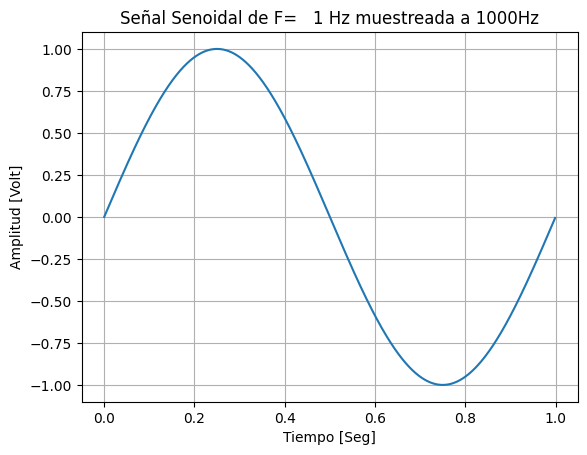

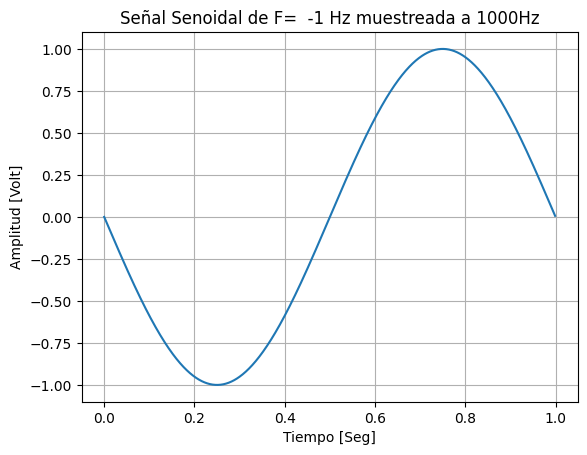

In [54]:

Freq_1 = 1
Freq_2 = -1

xx_1 = func_sen(A_max, DC_offset, Freq_1, Phase, N_sample, Fs)
xx_2 = func_sen(A_max, DC_offset, Freq_2, Phase, N_sample, Fs)

#Muestro el resultado
plt.figure(1)
plt.plot(tt, xx_1)
plt.title(f'Señal Senoidal de F={Freq_1:4} Hz muestreada a {Fs:4}Hz')
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Amplitud [Volt]')
plt.grid()

plt.figure(2)
plt.plot(tt, xx_2)
plt.title(f'Señal Senoidal de F={Freq_2:4} Hz muestreada a {Fs:4}Hz')
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Amplitud [Volt]')
plt.grid()


Evidentemente cambia la fase, esto tiene sentido ya que el seno es una funcion Impar, es decir:
$$sen(t) = - sen(-t)$$

Tambien otra forma de verlo es desde comparando los espectro

## Experimento 2 - Efecto de Aliasing

Para probar esto hay recordar el teorema de nyquist-shanon: el cual afima que para recuperar una señal analogia apartir de sus muestras digitales, la misma debe ser muestreada a una taza($F_S$) por lo menos dos veces mayor que la frecuencia maxima de la señal original($F_{max}$). Es decir:
$$ F_S \ge 2 F_{max}$$

si no se cumple esto, aparece el efecto de aliasing

Forzaremos este efecto con el generador de senoidales ingresando una frecuencia de señal mayor a la de muestreo.

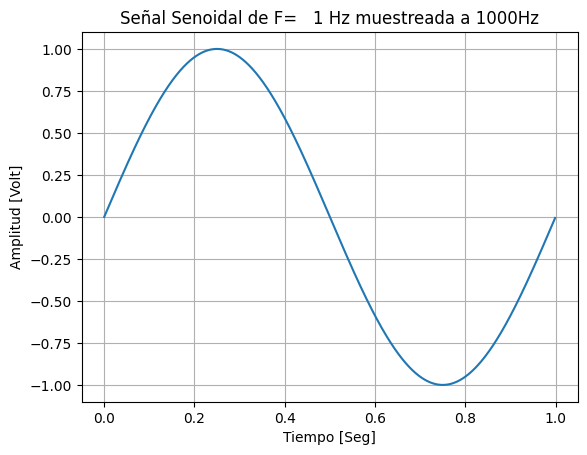

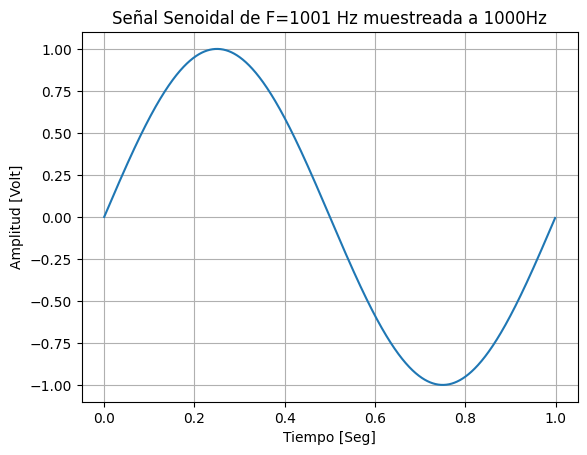

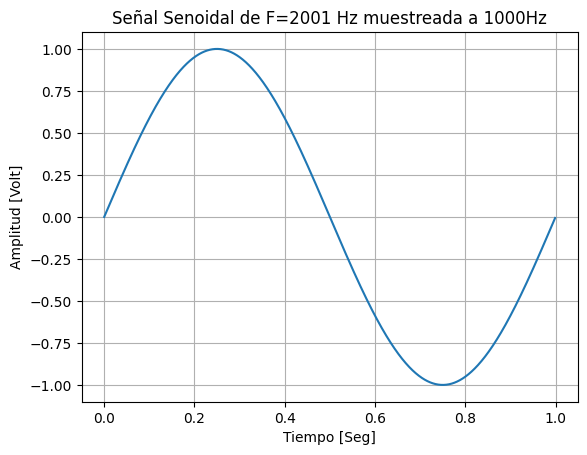

In [46]:
Freq_1 = 1
Freq_2 =   Fs + Freq_1 #primera frecuencia de Alias con Freq_1 
Freq_3 = 2*Fs + Freq_1 #segunda frecuencia de Alias con Freq_1

xx_1 = func_sen(A_max, DC_offset, Freq_1, Phase, N_sample, Fs)
xx_2 = func_sen(A_max, DC_offset, Freq_2, Phase, N_sample, Fs)
xx_3 = func_sen(A_max, DC_offset, Freq_3, Phase, N_sample, Fs)

#Muestro el resultado
plt.figure(1)
plt.plot(tt, xx_1)
plt.title(f'Señal Senoidal de F={Freq_1:4} Hz muestreada a {Fs:4}Hz')
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Amplitud [Volt]')
plt.grid()

plt.figure(2)
plt.plot(tt, xx_2)
plt.title(f'Señal Senoidal de F={Freq_2:4} Hz muestreada a {Fs:4}Hz')
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Amplitud [Volt]')
plt.grid()

plt.figure(3)
plt.plot(tt, xx_3)
plt.title(f'Señal Senoidal de F={Freq_3:4} Hz muestreada a {Fs:4}Hz')
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Amplitud [Volt]')
plt.grid()



viendo solo el grafico desde las muestras no se puede diferenciar cual es la frecuencia de la señal original.

***NOTA:*** En la vida real, cuando se muestrea una señal analogica con un conversor A/D, es necesaro poner un filtro antialiasing como primer bloque de la cadena para evitar este efecto indeseado.


## Experimento 3 - Frecuencias en la vencindad de Nyquist

¿Que ocurre si la señal de interes esta en el entorno de la frecuencia de Nyquist($F_{S}/2$)?

probaremos varios valores en este entorno


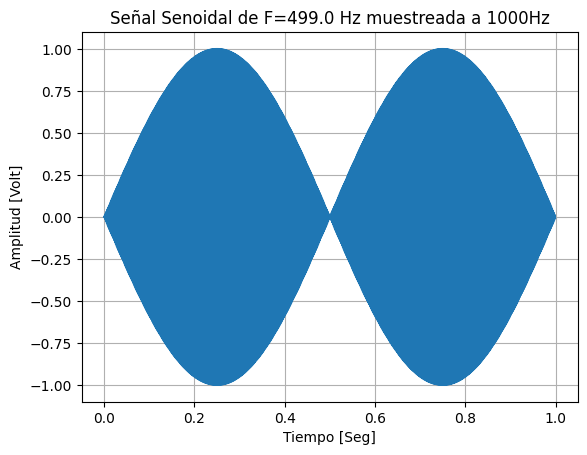

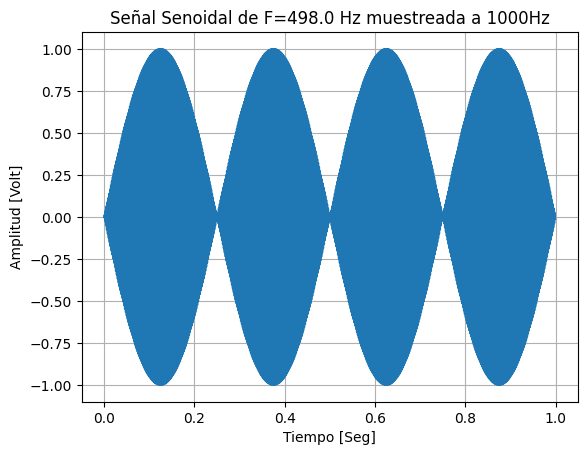

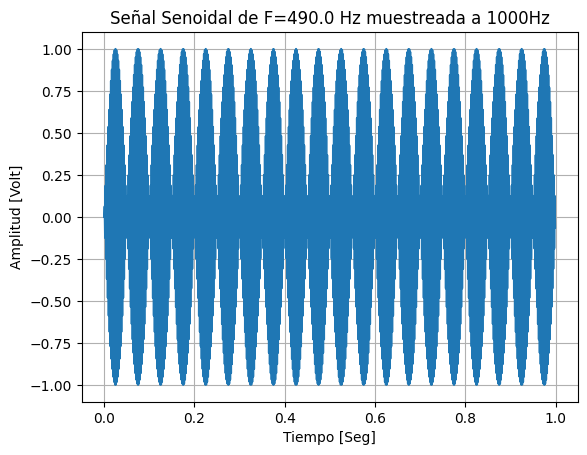

In [47]:
Freq_1 = Fs/2 - 1
Freq_2 = Fs/2 - 2  #primera frecuencia de Alias con Freq_1 
Freq_3 = Fs/2 - 10 #segunda frecuencia de Alias con Freq_1

xx_1 = func_sen(A_max, DC_offset, Freq_1, Phase, N_sample, Fs)
xx_2 = func_sen(A_max, DC_offset, Freq_2, Phase, N_sample, Fs)
xx_3 = func_sen(A_max, DC_offset, Freq_3, Phase, N_sample, Fs)

#Muestro el resultado
plt.figure(1)
plt.plot(tt, xx_1)
plt.title(f'Señal Senoidal de F={Freq_1:4} Hz muestreada a {Fs:4}Hz')
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Amplitud [Volt]')
plt.grid()

plt.figure(2)
plt.plot(tt, xx_2)
plt.title(f'Señal Senoidal de F={Freq_2:4} Hz muestreada a {Fs:4}Hz')
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Amplitud [Volt]')
plt.grid()

plt.figure(3)
plt.plot(tt, xx_3)
plt.title(f'Señal Senoidal de F={Freq_3:4} Hz muestreada a {Fs:4}Hz')
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Amplitud [Volt]')
plt.grid()

interesante efeceto, la forma de la envolvente recuenda a una modulacion de producto o BLU

## Experimento 4 - Muestrear una señal de frecuencia de Nyquist

Si se muestrea exantemente en la frecuencia de Nyquist, no esta asegurada la reconstruccion de la señal original, proque puede estar muestreando sobre los cruces por cero, en este caso estoy "Ortogonal" a la señal de interes

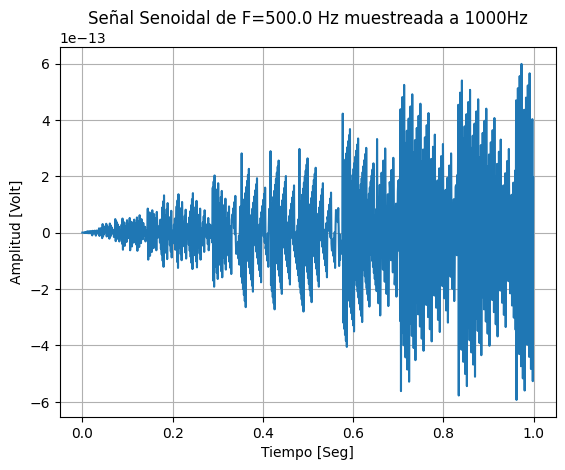

In [50]:
Freq_1 = Fs/2

xx_1 = func_sen(A_max, DC_offset, Freq_1, Phase, N_sample, Fs)

#Muestro el resultado
plt.figure(1)
plt.plot(tt, xx_1)
plt.title(f'Señal Senoidal de F={Freq_1:4} Hz muestreada a {Fs:4}Hz')
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Amplitud [Volt]')
plt.grid()

Esto llama la atencion, aparece un efecto de "serrucho" cuando deberia ver una linea continua 0. e incluso llega a 6 volt pico, mmmmm

![alt text](https://live.staticflickr.com/2552/3875741338_c2c1f9c707_c.jpg)

OJO al PIOJO!!: Al ver la escala vertical dice que los valores de la grilla estan multiplicados por 1e-13.

Lo que se observa es el error de arrastre y redondeo que se produce al usar la funcion `sin()` de nummpy almacenar un numero en formato de punto flotante, Python3 utiliza por defecto para variables de punto flotante doble presicion (bynary64 segun la [IEEE 754](https://es.wikipedia.org/wiki/IEEE_754)) 

Un ejemplo del error de redondeo se ve al querer sumar 0.2 y 0.1 obteniendo lo siguiente

In [53]:
0.2 + 0.1

0.30000000000000004